In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("D:\downloads 2\sample_covid19_data.csv", parse_dates=["Date"])
df.head()


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Sandipan Jana\AppData\Local\Temp\ipykernel_25716\444984253.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("D:\downloads 2\sample_covid19_data.csv", parse_dates=["Date"])


,Date,Country,Confirmed,Recovered,Deaths
0,2020-03-01,India,19765,8641,8151
1,2020-03-01,United States,21101,10584,5465
2,2020-03-01,Brazil,16607,9190,7301
3,2020-03-01,Italy,27460,15265,1927
4,2020-03-01,Germany,17273,1462,587


#  Preprocessing and Cleaning

In [3]:
df = df.dropna()
df = df.groupby(['Date', 'Country'])[['Confirmed', 'Recovered', 'Deaths']].sum().reset_index()


# Cumulative Cases Over Time (Global View)

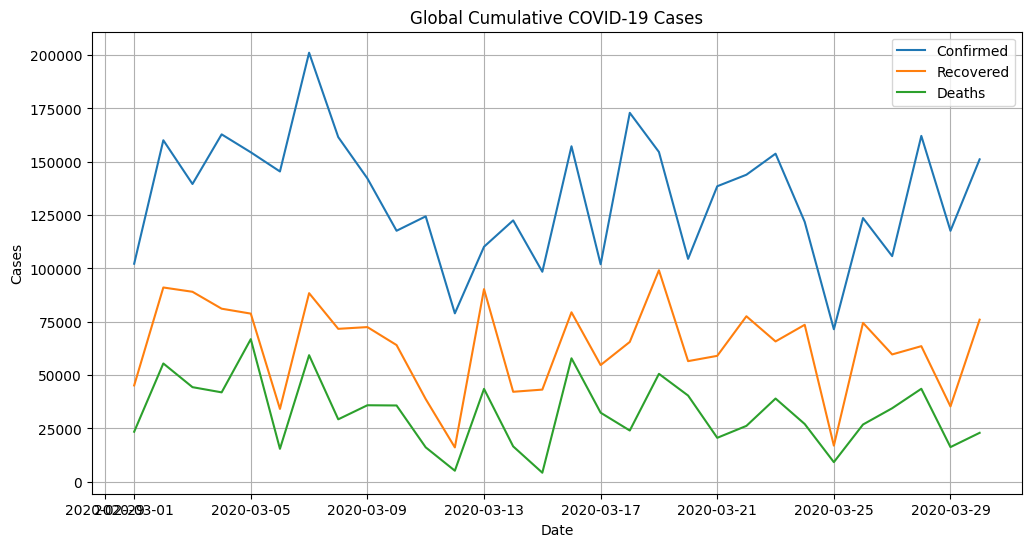

In [4]:
global_df = df.groupby("Date")[['Confirmed', 'Recovered', 'Deaths']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(global_df['Date'], global_df['Confirmed'], label='Confirmed')
plt.plot(global_df['Date'], global_df['Recovered'], label='Recovered')
plt.plot(global_df['Date'], global_df['Deaths'], label='Deaths')
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Global Cumulative COVID-19 Cases")
plt.legend()
plt.grid(True)
plt.show()


# Area Chart for Case Comparison

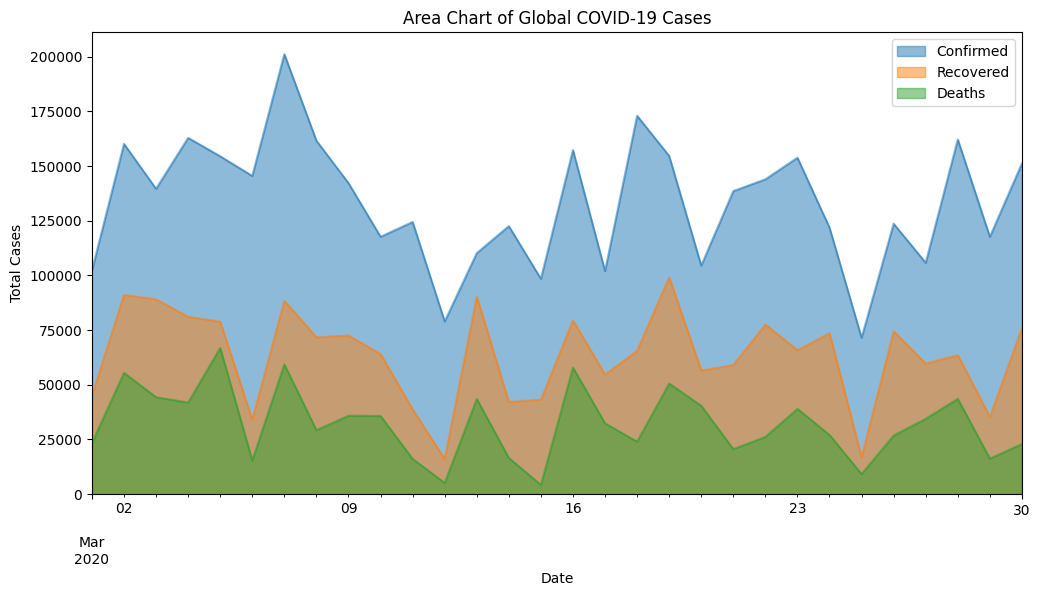

In [5]:
global_df.set_index('Date')[['Confirmed', 'Recovered', 'Deaths']].plot.area(stacked=False, alpha=0.5, figsize=(12,6))
plt.title("Area Chart of Global COVID-19 Cases")
plt.ylabel("Total Cases")
plt.show()


# Heatmap: Daily New Cases by Country

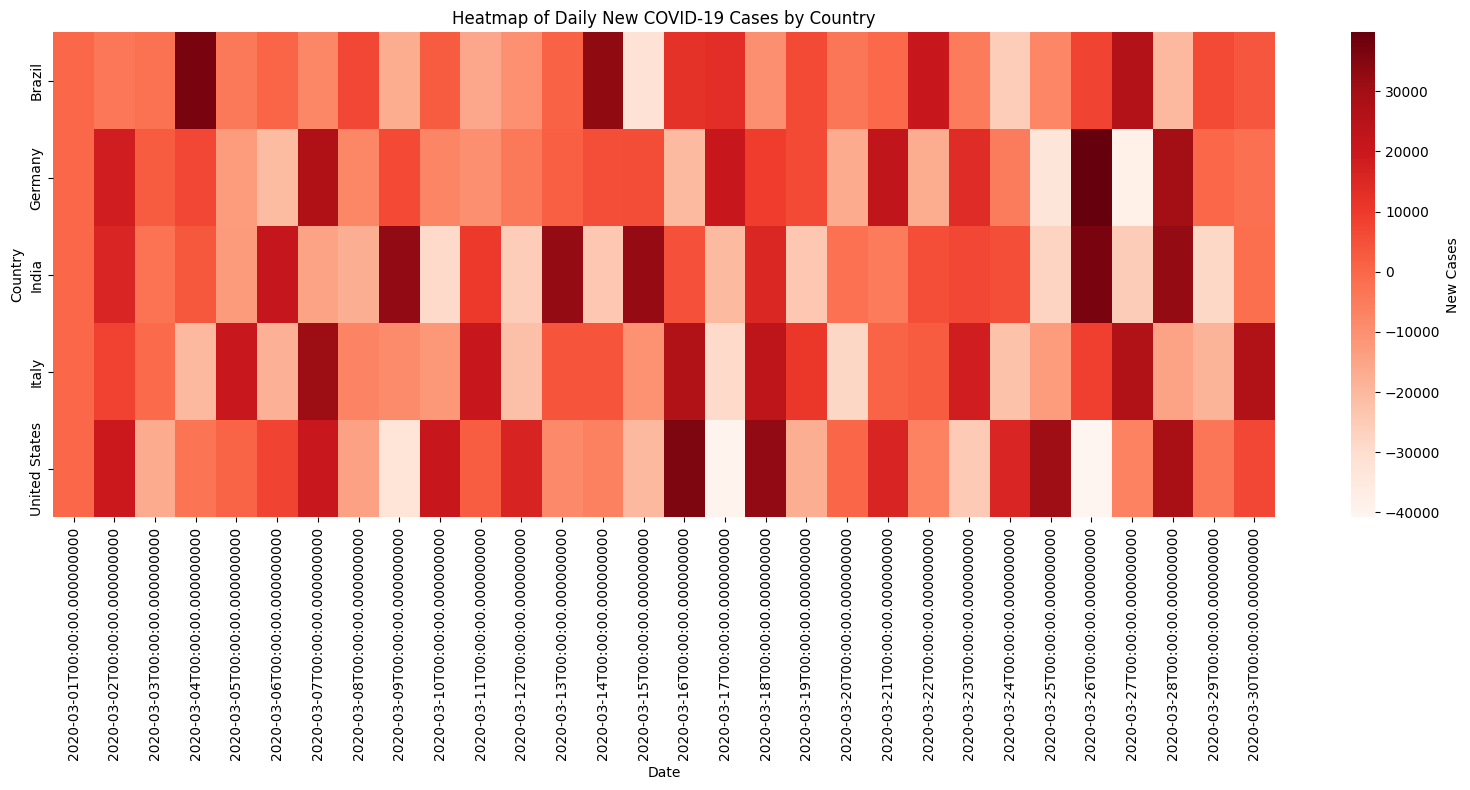

In [6]:

df['NewCases'] = df.groupby('Country')['Confirmed'].diff().fillna(0)
pivot = df.pivot(index='Date', columns='Country', values='NewCases').fillna(0)

plt.figure(figsize=(16, 8))
sns.heatmap(pivot.T, cmap='Reds', cbar_kws={'label': 'New Cases'})
plt.title("Heatmap of Daily New COVID-19 Cases by Country")
plt.xlabel("Date")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


# Compare Specific Countries

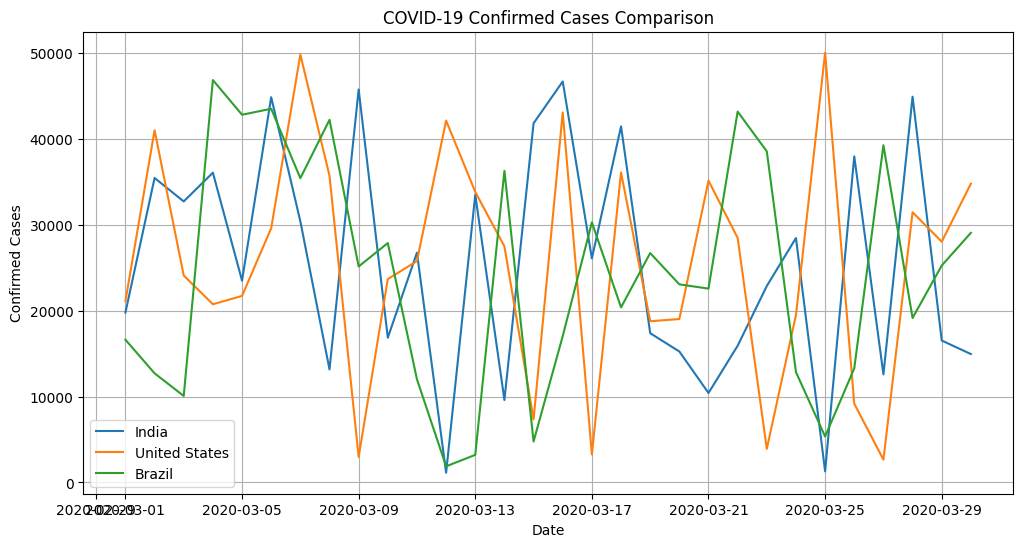

In [7]:
countries = ['India', 'United States', 'Brazil']
subset = df[df['Country'].isin(countries)]

plt.figure(figsize=(12, 6))
for country in countries:
    country_data = subset[subset['Country'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country)

plt.title("COVID-19 Confirmed Cases Comparison")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.grid(True)
plt.show()
